In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_theme(style='whitegrid')
population = pd.read_csv('../BDD/population.csv', sep=';')
energy = pd.read_csv('../BDD/energy.csv')
gdp = pd.read_csv('../BDD/world-gdp-over-the-last-two-millennia.csv', sep=';')

gpec = pd.read_csv('../BDD/global-energy-substitution.csv')
total = gpec['Wind (TWh; substituted energy)']+gpec['Oil (TWh; substituted energy)']+gpec['Nuclear (TWh; substituted energy)']+ gpec['Hydropower (TWh; substituted energy)']+gpec['Traditional bimass (TWh; substituted energy)']+gpec['Other renewables (TWh; substituted energy)']+gpec['Biofuels (TWh; substituted energy)']+gpec['Solar (TWh; substituted energy)']+ gpec['Coal (TWh; substituted energy)']+gpec['Gas (TWh; substituted energy)']
gpec['Total (TWh)']=total


int = pd.merge(gdp[gdp.Code == 'OWID_WRL'],gpec[gpec.Code == 'OWID_WRL'], on=['Year'] )
complete_data = pd.merge(int, gdp, on=['Year'])
complete_data.drop('Entity_x', axis=1, inplace=True)
complete_data.columns



Index(['Code_x', 'Year',
       'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x',
       'Population_x', 'Entity_y', 'Code_y', 'Wind (TWh; substituted energy)',
       'Oil (TWh; substituted energy)', 'Nuclear (TWh; substituted energy)',
       'Hydropower (TWh; substituted energy)',
       'Traditional bimass (TWh; substituted energy)',
       'Other renewables (TWh; substituted energy)',
       'Biofuels (TWh; substituted energy)', 'Solar (TWh; substituted energy)',
       'Coal (TWh; substituted energy)', 'Gas (TWh; substituted energy)',
       'Total (TWh)', 'Entity', 'Code',
       'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_y',
       'Population_y'],
      dtype='object')

In [2]:
WRLD_table = complete_data[['Year', 'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x', 'Population_x', 'Total (TWh)', 'Entity', 'Code']]


In [3]:
def derivee(t, y) :
    der = []
    n=len(t)-2
    for i in range(2,n) : 
        der.append((y[i+2]-y[i-2])/(t[i+2]-t[i-2]))
    return t[2:n], np.array(der)

gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
year=int['Year']

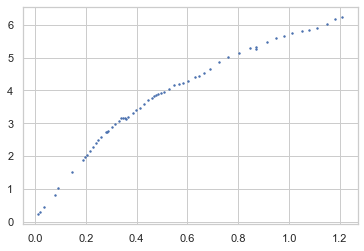

In [4]:
plt.scatter(gdp, energy, s=2)

C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:130: RuntimeWarning: invalid value encountered in double_scalars
  slope = r_num / ssxm
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
C:\Users\leatr\anaconda3\lib\site-packages\scipy\stats\_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in double_scalars
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


Text(0.5, 1.0, 'Loss = 18.785886699820242')

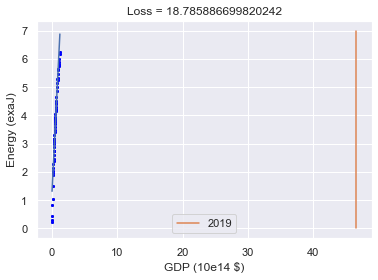

In [5]:
import regressions as reg

def piecewise_regression(xdata, ydata, step = 2) :
    n = len(xdata)

    r1, y1 = reg.linReg(xdata[0:step+1], ydata[0:step+1])
    linLoss = reg.linLoss(xdata[0:step], ydata[0:step], r1, y1)

    r2, y2= reg.expReg(xdata[step:], ydata[step:])
    expLoss = reg.expLoss(xdata[step:], ydata[step:], r2, y2)

    loss = linLoss+expLoss
    lim = step

    for i in range (step, n, step) :
        rlin, ylin = reg.linReg(xdata[0:i], ydata[0:i])
        rexp, yexp = reg.expReg(xdata[i:], ydata[i:])
        linLoss = reg.linLoss(xdata[0:i], ydata[0:i], rlin, ylin)
        expLoss = reg.expLoss(xdata[i:], ydata[i:], rexp, yexp)
        if expLoss+linLoss < loss : 
            loss = expLoss+linLoss
            r1, y1 = rlin, ylin
            r2, y2 = rexp, yexp
            lim = i
    return lim, (r1, y1), (r2, y2)

piecewise_regression(gdp, energy, 1)
a, xlim, r, y0 = reg.linExpReg(gdp, energy, p0 = (8.54249090463964, gdp[21],0.6 , 2.6345032080655955))

import seaborn as sns 
sns.set_theme()
plt.scatter(gdp, energy, s=4)
xplot = np.linspace(gdp.min(),gdp.max(), 200)
# plt.plot(xplot, reg.lin_exp(xplot,a, xlim, r, y0 ), color='red')
a, xlim, r, y0 = reg.linPowReg(gdp, energy, p0 = (0.0010959084284438464, gdp[5], 4, 1))
plt.scatter(gdp, energy, s=4, color='blue')
xplot = np.linspace(gdp.min(),gdp.max(), 200)
plt.plot(xplot, reg.lin_pow(xplot, a, xlim, r, y0 ))
plt.ylabel("Energy (exaJ)")
plt.xlabel("GDP (10e14 $)")
ypred= reg.lin_pow(gdp, a, xlim, r, y0 )
loss = reg.l2_loss(ypred, energy)
dist = np.array([abs(gdp[i]-xlim) for i in range(len(gdp))])
plt.plot([xlim]*15, np.linspace(0,7,15), label = str(year[dist.argmin()]))
plt.legend()
plt.title('Loss = '+str(loss))

In [6]:
a, xlim, r, y0 

(4.648039190472486, 46.575899233249444, 0.9757407121030368, 5.131647220855895)

<ipython-input-7-69bfeba99b6e>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['Energy(PJ)-GDP(10e14$)'] = ypred


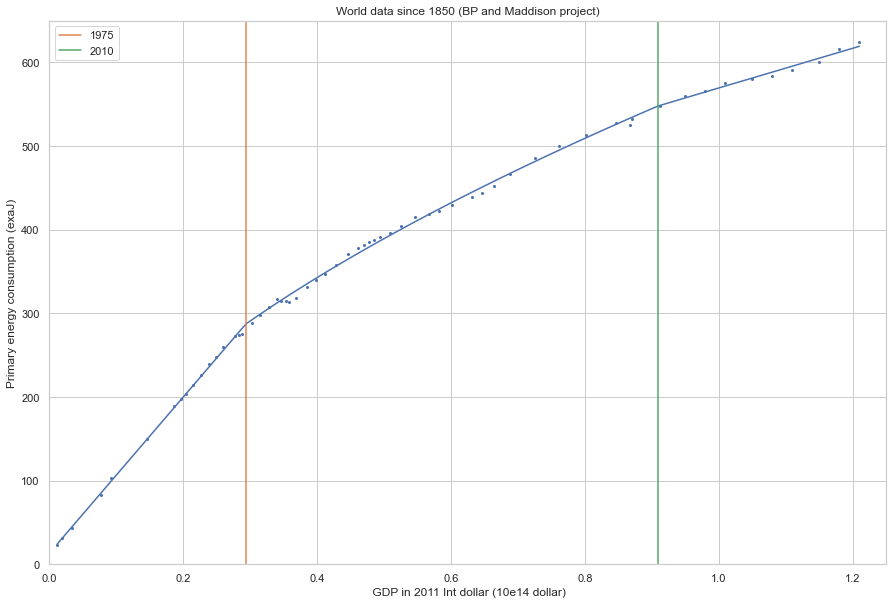

In [7]:
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**14
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
sns.set_theme(style='whitegrid')
plt.figure(figsize=(15,10))
a,y0,r,m, x1, x2 = reg.linPowLin(gdp, energy, p0= (9.289362129335744,  5.682514161047432,0.5445642627963901 , 0.1,0.30726966390378224, 1.1))
plt.scatter(gdp, 100*energy, s= 4)
dist1 = np.array([abs(gdp[i]-x1) for i in range(len(gdp))])
dist2 = np.array([abs(gdp[i]-x2) for i in range(len(gdp))])

plt.plot(xplot, 100*reg.lin_pow_lin(xplot,a,y0,r,m, x1, x2 ) )
plt.plot([x1]*15, np.linspace(0,650,15), label = str(year[dist1.argmin()]))
plt.plot([x2]*15, np.linspace(0,650,15), label = str(year[dist2.argmin()]))
plt.legend()
ypred = reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )
loss = reg.l2_loss(energy, ypred)
plt.ylabel("Primary energy consumption (exaJ)")
plt.xlabel(" GDP in 2011 Int dollar (10e14 dollar)")
plt.title('World data since 1850 (BP and Maddison project)')
plt.xlim(0,1.25)
plt.ylim(0,650)
ypred= reg.lin_pow_lin(gdp,a,y0,r,m, x1, x2 )*(10**5)
WRLD_table['Energy(PJ)-GDP(10e14$)'] = ypred

In [8]:
from scipy.stats import pearsonr
coeff_pearson,_ = pearsonr(energy,ypred)
coeff_pearson

0.9996419095813635

In [9]:
a,y0,r,m, x1, x2 
b= y0*(x1**r)-a*x1
p = y0*(x2**r)-m*x2

In [10]:
m, p

(2.373379206161014, 3.321475489846558)

In [11]:
pop = int['Population']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3
energy = np.array(int['Total (TWh)'])*3.6/10**5 # en exa Joules
time = int['Year']
year=int['Year']

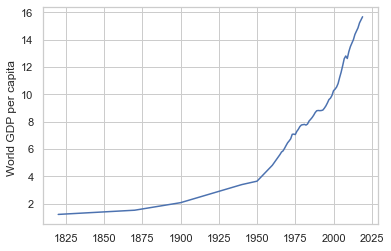

In [12]:
plt.ylabel("World GDP per capita ")
plt.plot(time, gdp/pop)

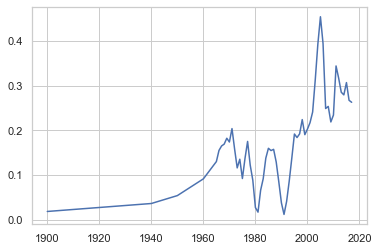

In [13]:
year, der = derivee(time, gdp/pop)
plt.plot(year, der )

In [14]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3
y0, r, a, m, t1, t2 =reg.expLinLin(year, gdp/pop, p0 =(0.00973, 2*10**-5, 0.0012, 0.0014,1950, 1990 ))

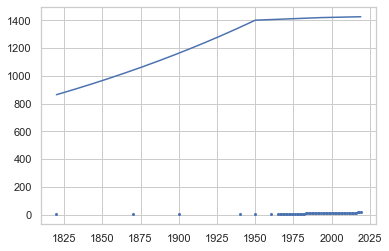

In [15]:
xplot = np.linspace(year.min(), year.max(), 200)
plt.scatter(year, gdp/pop, s=4)
plt.plot(xplot, (10**2)*reg.exp_lin_lin(xplot,y0, r, a, m, t1, t2))

In [16]:
a, m

(0.00449628184476814, 0.0023790327671991598)

In [17]:
def f(x, b=3, c=5) :
    return b/(c-x)
f = np.vectorize(f)

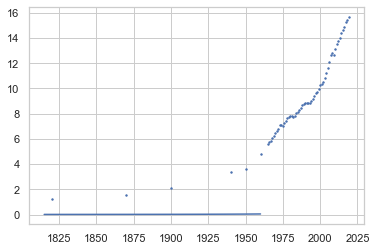

In [18]:
x = np.linspace(1815, 1960)
plt.scatter(time, gdp/pop, s= 2)
plt.plot(x, f(x, c=1998, b=0.175*10**1))

In [19]:
reg.hypLinLin(time, gdp/pop, p0 =(1.75, 1998, 9.3, 2.4, 1960, 1990) )

(215.53890901876613,
 2004.055564326676,
 8.172454771831923,
 0.19676149733075055,
 1975.5255189471864,
 1975.3571140434826)

<ipython-input-20-2108ebcb3faf>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['GDPC(k$)-Time(year)'] = ypred


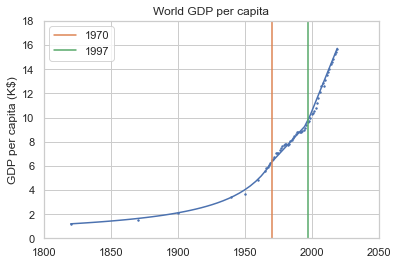

In [20]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**3

timeplot = np.linspace(time.min(), time.max(), 50)
plt.scatter(time, gdp/pop , s=2)
plt.plot(timeplot, (10**2)*reg.hyp_lin_lin(timeplot, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0027414715784530846,
 1970.2090080602459,
 1996))
ypred=reg.hyp_lin_lin(time, 2.220576025536284,
 2005.2740209798799,
 0.0011952677933799649, 
 0.0028414715784530846,
 1970.2090080602459,
 1997)
loss = reg.l2_loss(gdp/pop, ypred)
plt.title('Loss = '+str(loss))
plt.plot([1970,1970], [0.00, 18], label='1970')
plt.plot([1997,1997], [0.00, 18], label='1997')
plt.legend()
plt.ylabel('GDP per capita (K$)')
plt.title("World GDP per capita")
plt.xlim(1800, 2050)
plt.ylim(0,18)
ypred= (10**2)*ypred
WRLD_table['GDPC(k$)-Time(year)'] = ypred

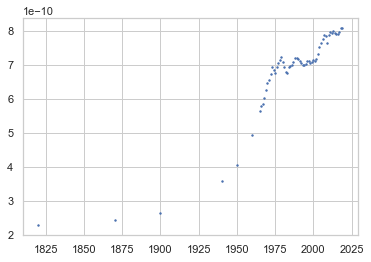

In [21]:
plt.scatter(time,energy/pop, s= 2)

No handles with labels found to put in legend.
<ipython-input-22-fa9c356ad824>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  WRLD_table['GDP(2011$)-Time(year)'] =ypred


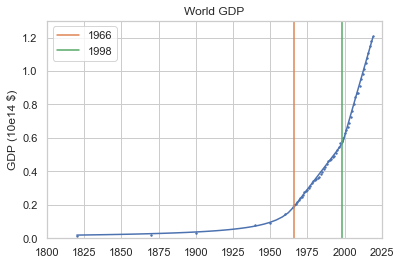

In [22]:
year=int['Year']
gdp = np.array(int['World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))'])/10**5
plt.scatter(time, gdp/10**9, s=2)

ypred= reg.hyp_lin_lin(time, 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000)
loss = reg.l2_loss(gdp/10**9, ypred)
plt.title('World GDP')

plt.legend()
plt.ylabel('GDP (10e14 $)')

b,c,d,f,x1,x2 = reg.hypLinLin(time, gdp/10**9, p0 = ( 4.,
 1989.2740209798799,
 0.0110677933799649, 
 0.03214715784530846,
 1977,
 2000), bounds = [0,2010], maxfev= 5000)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,b,c,d,f,x1,x2) )
plt.plot([x1,x1], [0.00, 1.3], label='1966')
plt.plot([x2, x2], [0.00, 1.3], label='1998')
plt.xlim(1800, 2025)
plt.ylim(0, 1.3)
plt.legend()
ypred = (10**14)*ypred
WRLD_table['GDP(2011$)-Time(year)'] =ypred

In [23]:
WRLD_table

,Year,World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x,Population_x,Total (TWh),Entity,Code,Energy(PJ)-GDP(10e14$),GDPC(k$)-Time(year),GDP(2011$)-Time(year)
0,1820,1.200000e+12,989818304,6264,World,OWID_WRL,24058.010862,1.198536,2.363032e+12
1,1870,1.920000e+12,1262682112,8592,World,OWID_WRL,30783.333838,1.641539,3.353622e+12
2,1900,3.420000e+12,1650000000,12128,World,OWID_WRL,44794.423371,2.109330,4.480587e+12
3,1940,7.810000e+12,2300000000,22840,World,OWID_WRL,85800.212071,3.401929,8.117868e+12
4,1950,9.250000e+12,2536431104,28516,World,OWID_WRL,99250.858023,4.017395,1.018485e+13
...,...,...,...,...,...,...,...,...,...
56,2015,1.080000e+14,7379796992,162024,World,OWID_WRL,588472.503250,14.649630,1.062658e+14
57,2016,1.110000e+14,7464022016,164081,World,OWID_WRL,595592.640869,14.933777,1.094805e+14
58,2017,1.150000e+14,7547858944,166824,World,OWID_WRL,605086.157693,15.217924,1.126953e+14
59,2018,1.180000e+14,7631091200,171240,World,OWID_WRL,612206.295312,15.502071,1.159100e+14


In [24]:
x2

1998.4692320973388

In [25]:
f, g

NameError: name 'g' is not defined

In [ ]:
plt.scatter(time, energy, s= 2)
x = np.linspace(1815, 1972)
plt.plot(timeplot, reg.hyp_lin_lin(timeplot,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002))
plt.ylabel('Energy (exaJ)')
plt.xlabel('Year')
ypred = reg.hyp_lin_lin(time,41,
 1988,
 0.0667933799649, 
 0.0991184530846,
 1972,
 2002)
loss = reg.l2_loss(ypred, energy)
plt.title("World primary energy consumption")
plt.plot([1972,1972], [0.00, 7], label='1972')
plt.plot([2002,2002], [0.00, 7], label='2002')
plt.ylim(0, 7)
plt.xlim(1800, 2025)
plt.legend()

ypred = (10**3)*ypred
WRLD_table['Energy(PJ)-Time(Year)'] = ypred

In [ ]:
b,c,d,f,x1,x2 = 41,1988,0.0667933799649, 0.0991184530846,1972,2002
e = (b/(-x1+c)) - d*x1 
g = (d-f)*x2 + e

In [ ]:
f, g

In [ ]:
en = energy*10**10
plt.scatter(time, en/pop, s= 2)

In [ ]:
plt.scatter(year, energy/gdp*10**8, s=2)

In [ ]:
yplot = np.linspace(year.min(), year.max(), 200) 
a,b, c, e, g, x1, x2, x3 = -0.2, 5, -0.01, -0.2, -1, 1950, 1975, 2100
a,b, c, e, g, x1, x2, x3 = reg.LLLL(year,energy/gdp*10**8, p0=(a,b, c, e, g, x1, x2, x3) , bounds = [-2, 2200] )
plt.plot(yplot, (10**-8)*reg.llll(yplot, a,b, c, e, g, x1, x2, x3))
plt.scatter(year, energy/gdp, s = 2)
plt.ylabel("ExaJ/$")
plt.title("Energy/GDP")



plt.legend()
ypred= reg.llll(year, a,b, c, e, g, x1, x2, x3)*(10**-8)*(10**3)
WRLD_table['EI(PJ/$)-Time(year)'] = ypred
plt.plot([1975,1975],[0.5*10**-8,1.9*10**-8])

In [ ]:
d = (a-c)*x1 + b
f = (c-e)*x2 +d
h = (e-g)*x3 + f

In [ ]:
a,b 

In [ ]:
c,d 

In [35]:
e, f

(-0.010357793083859968, 21.416776399164725)

Text(0.5, 1.0, 'Variation in (%), World')

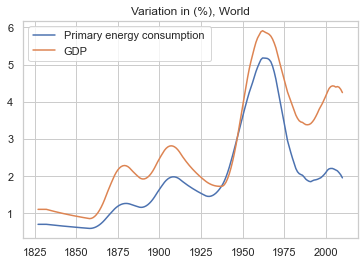

In [36]:
from derivee import growth_rate
x, y=growth_rate(year, energy, s=10, a =15 )
x1,y1 = growth_rate(year, gdp, s=10, a=15)
plt.plot(x,y, label = "Primary energy consumption ")
plt.plot(x1, y1, label = "GDP" )
plt.legend()
plt.title("Variation in (%), World")


In [37]:
final_energy = pd.read_csv('../BDD/world-total-final-consumption-by-source-1973-2018.csv', sep=';')





In [38]:
final_energy.columns


Index(['Year', 'Coal               ', 'Oil                  ',
       'Natural gas          ', 'Biofuels and waste', 'Electricity          ',
       'Other            ', 'Total (Mtoe)', 'Total (TWh) '],
      dtype='object')

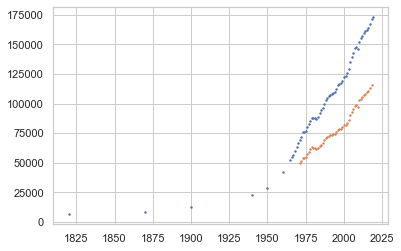

In [39]:
plt.scatter(year, complete_data['Total (TWh)'], s = 2)
plt.scatter(final_energy['Year'], final_energy['Total (TWh) '], s=2)

Text(0.5, 1.0, 'Efficacité énergétique monde')

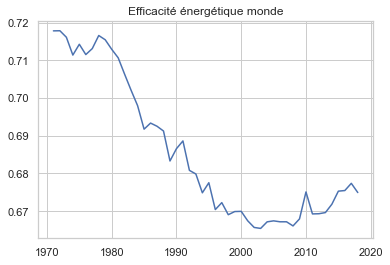

In [40]:
A = np.array(complete_data['Total (TWh)'][12:60])
B = np.array(final_energy['Total (TWh) '])
C = B/A
plt.plot(final_energy['Year'], C)
plt.title("Efficacité énergétique monde")

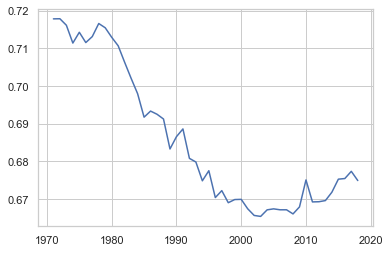

In [41]:
plt.plot(final_energy['Year'], C)

In [42]:
len(complete_data['Total (TWh)'])

61

In [43]:
len(final_energy['Total (TWh)'])

KeyError: 'Total (TWh)'

In [44]:
end = complete_data['Total (TWh)']/final_energy['Total (TWh)'].dropna()
end.describe()

KeyError: 'Total (TWh)'

In [45]:
i =np.array([1,2,3]).argmin()
i

0

In [46]:
WRLD_table = WRLD_table.rename(columns={'Total (TWh)':'Primary energy (TWh)', 'Population_x' : 'Population', 'World GDP in 2011 Int.$ (OWID based on World Bank & Maddison (2017))_x' :  'GDP'})

In [47]:
WRLD_table

,Year,GDP,Population,Primary energy (TWh),Entity,Code,Energy(PJ)-GDP(10e14$),GDPC(k$)-Time(year),GDP(2011$)-Time(year),Energy(PJ)-Time(Year),EI(PJ/$)-Time(year)
0,1820,1.200000e+12,989818304,6264,World,OWID_WRL,24058.010862,1.198536,2.363032e+12,244.047619,0.000019
1,1870,1.920000e+12,1262682112,8592,World,OWID_WRL,30783.333838,1.641539,3.353622e+12,347.457627,0.000016
2,1900,3.420000e+12,1650000000,12128,World,OWID_WRL,44794.423371,2.109330,4.480587e+12,465.909091,0.000014
3,1940,7.810000e+12,2300000000,22840,World,OWID_WRL,85800.212071,3.401929,8.117868e+12,854.166667,0.000011
4,1950,9.250000e+12,2536431104,28516,World,OWID_WRL,99250.858023,4.017395,1.018485e+13,1078.947368,0.000011
...,...,...,...,...,...,...,...,...,...,...,...
56,2015,1.080000e+14,7379796992,162024,World,OWID_WRL,588472.503250,14.649630,1.062658e+14,5854.841289,0.000005
57,2016,1.110000e+14,7464022016,164081,World,OWID_WRL,595592.640869,14.933777,1.094805e+14,5953.959742,0.000005
58,2017,1.150000e+14,7547858944,166824,World,OWID_WRL,605086.157693,15.217924,1.126953e+14,6053.078195,0.000005
59,2018,1.180000e+14,7631091200,171240,World,OWID_WRL,612206.295312,15.502071,1.159100e+14,6152.196648,0.000005


In [106]:
WRLD_table.to_csv('../BDD/OWID_WRL.csv', index=False)

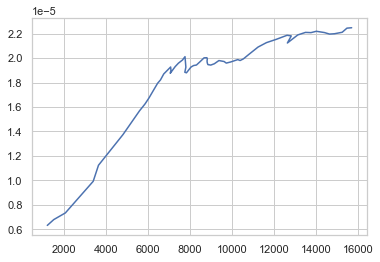

In [48]:
plt.plot(WRLD_table['GDP']/WRLD_table['Population'], WRLD_table['Primary energy (TWh)']/WRLD_table['Population'])

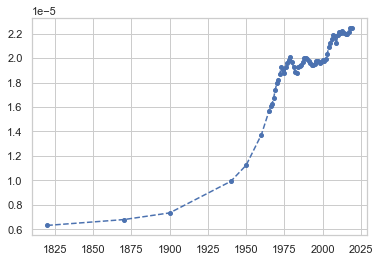

In [60]:
plt.plot(WRLD_table['Year'], WRLD_table['Primary energy (TWh)']/WRLD_table['Population'], linestyle='dashed', marker='o', markersize=4)